# <span style="color:purple; font-weight:bold">K Means Clustering</span>

K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into a pre-specified number of distinct, non-overlapping subgroups (clusters)

<span style="color:purple; font-weight:bold">We are using it as a Data Labelling Algorithm here !</span>


## <span style="color:purple; font-weight:bold">Key Concepts</span>              


- <span style='color:blue; font-weight:bold'> Unsupervised Learning: </span> The algorithm works with unlabeled data; it finds patterns and groupings without prior information about which group a data point belongs to.      

- <span style='color:blue; font-weight:bold'> The 'K' Value: </span> This is the crucial, user-defined parameter representing the number of clusters the algorithm will create.             

- <span style='color:blue; font-weight:bold'> Centroids: </span> Each cluster is defined by a central point, called a centroid. These centroids are initialized randomly and then iteratively moved to the average (mean) position of all points assigned to their respective cluster.                  

- <span style='color:blue; font-weight:bold'> Distance Metric: </span>Typically, the algorithm uses Euclidean distance (the straight-line distance) to measure how close a data point is to a centroid.                 

- <span style='color:blue; font-weight:bold'> Objective Function:</span> K-means minimizes the "within-cluster sum of squares" (WCSS) or inertia, which is the sum of the squared distances between each data point and the centroid of the cluster it belongs to.                  

- <span style='color:blue; font-weight:bold'>Iterative Process:</span> The core of the algorithm involves repeating two steps until the centroids stop moving or a maximum number of iterations is reached.                       
    * Assignment Step (E-step): Each data point is assigned to the nearest centroid.
    * Update Step (M-step): The centroids are recalculated as the mean of all data points assigned to that cluster.
---             

The circular balls are the 'centroids' of each cluster.                 

<img src="./assets/images/KMeans_Clustering_2.gif" width="500"  height="300" style="margin-left:auto; margin-right:auto; display:block"/>   



In [162]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [163]:
df = pd.read_csv("./assets/files/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

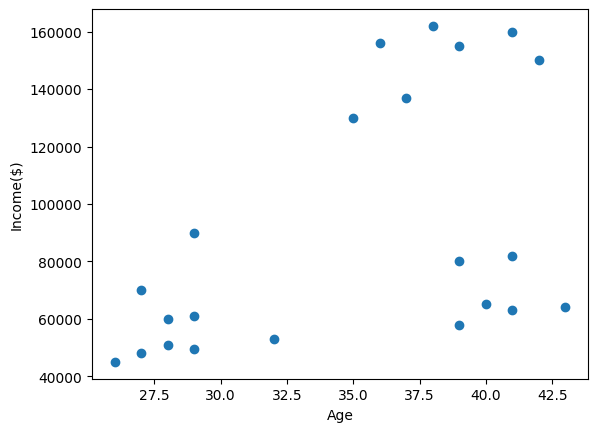

In [164]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [165]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   # Classifying data points into clusters
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [166]:
# Adding cluster column to original dataframe
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [167]:
# Printing the x,y coordinates of cluster centers
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

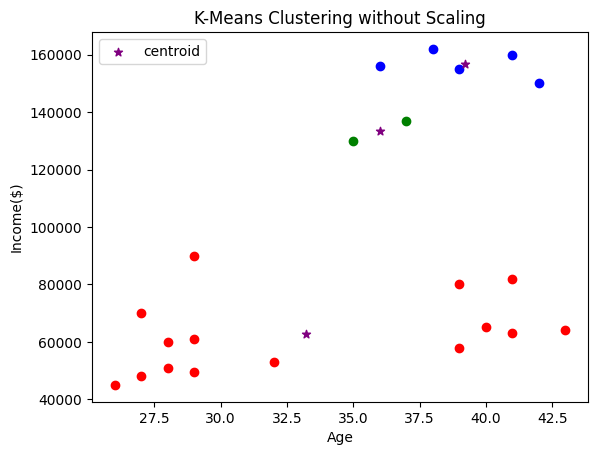

In [168]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.title("K-Means Clustering without Scaling")
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') # Printing centroids of each cluster group in purple star.

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

**In the above graph you can see that blue and green cluster is not being defined (scattered) properly.**               

**This is because our scaling of Y and X axis data is wrong.**                      

**In Y axis we have a generous range from 40000-160000, but for X axis we only have 0-45**                      

**We need a preprocessing in our data to transform into a better scale.**               

**I am leaving short notes on MinMaxScaler inside [scale_data.ipynb](side_concept/scale_data.ipynb) file**


In [169]:
# Dataframe before scaling
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [170]:
# Preprocessing the data for better results using MinMaxScaler  
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

# Dataframe after scaling
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


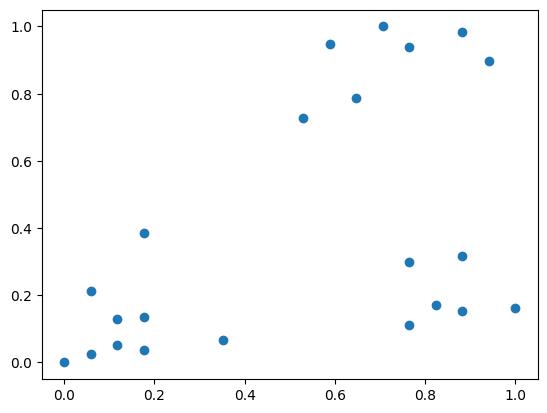

In [171]:
plt.scatter(df['Age'], df['Income($)'])

** Using Kmeans clustering on this transformed data for better results**

In [172]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   # Classifying data points into clusters
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [173]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [174]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

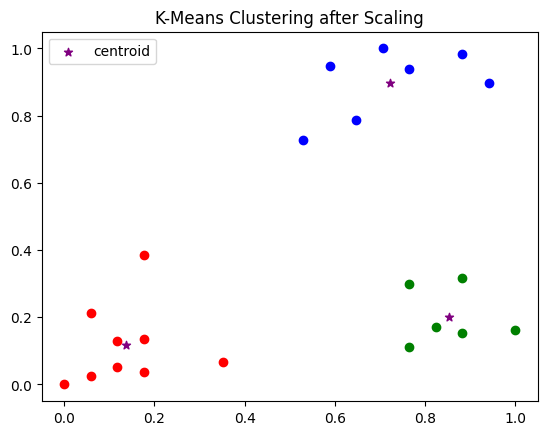

In [175]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.title("K-Means Clustering after Scaling")
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') # Printing centroids of each cluster group in purple star.

plt.legend()

---     

**Compare the results of using KMeans Clustering on preprocessed and non-preprocessed data.**                   
**We got better centroids after scaling the data.**              

<img src="./assets/images/Pre_Scaling_Data.png" width="547" height="435" style="margin-right:30px"/>   

<img src="./assets/images/Post_Scaling_Data.png" width="547" height="435" />        

---         



## <span style="color:blue; font-weight:bold">Elbow Plot </span>   

**The "elbow" point on the plot, where the <ins>rate of decrease in WCSS</ins> slows down significantly, is chosen as the optimal \(k\).**                  

<img src="./assets/images/KMeans_Clustering_1.gif" width="700"  height="400" style="margin-left:auto; margin-right:auto; display:block;"/>              
        
---

In [176]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # inertia_ is the sum of squared distances to closest cluster center

**We will be visualizing our 'k' paramter value for each iteration and see the graph for the elbow point.**   

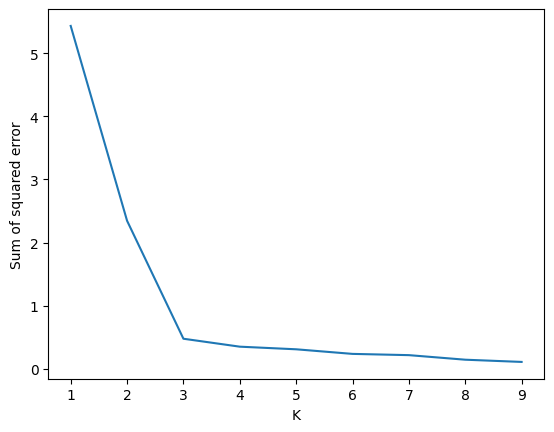

In [177]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**From the graph we can see k=3 is the elbow meaning its the optimal parameter value for the model.**               
**Changing k after 3 is not yeliding significant results.**